**Week 4:**<hr style="height: 3.0px"/>
This problem requires us to know how to:
* import libraries `numpy`, `sympy`, `matplotlib`;
* symbolically manipulate an equation using `sympy.solve()`;
* generate x and y data for a function using `numpy.linspace()`;
* plot the x, y data using `matplotlib.pyplot.plot()`;
* add horizontal lines and text to a plot.

**Problem Statement:**  Computations of the Density and Percent Crystallinity of Polyethylene (Callister 10th ed., section 14.11)
        
The % crystallinity is given by:

 $$  \mathbf{\text{% crystallinity} =  \frac{\rho_c (\rho_s - \rho_a)}{\rho_s (\rho_c - \rho_a)} * 100} $$

(1) Calculate the percent crystallinity of a branched polyethylene that has a density of  $0.925\ 𝑔\ 𝑐𝑚^{-3}$ . The density of a totally amorphous material is  $0.870 \ 𝑔\ 𝑐𝑚^{-3}$  and the density of a totally crystalline material is  $0.998 \ 𝑔\ 𝑐𝑚^{-3}$ .

(2) Calculate the density versus % crystallinity and reproduce the following plot (including the horizontal lines and text):

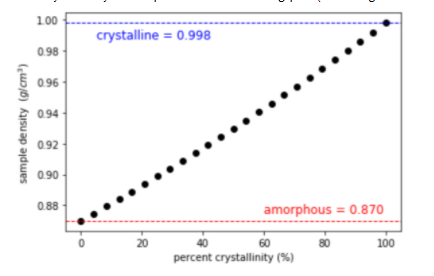

(3) Export your data to an excel file. 

**Practice**

(P1) Write a function that finds "x" random points in a square of edge length 2 centered at (0,0). Determines how many of these points are contained in a circle of radius 1 centered at (0,0). Returns the value $\left(4\times \frac{\text{pts in circle}}{\text{total num pts}}\right)$.  Plot the value $\left(4\times \frac{\text{pts in circle}}{\text{total num pts}}\right)$ versus number of points, x.  Also include a horizontal line at the value of pi on your plot.  

(P2) Import the csv file "titanic.csv" and (a) determine the percentage of woman that survived and the percentage of men that survived and (b) determine the average ticket price (Fare) for those that survived versus those that did not survive.  0 = did not survive. 1 = survived.  


#### You will need the following extensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy.solvers import solve #for solving equations symbolically
from sympy import symbols #for solving equations symbolically

#### (1) For this part you will want to write a simple function that takes sample_density, amorphous_density and crystalline_density and returns the percent_crystallinity

 $$  \mathbf{\text{% crystallinity} =  \frac{\rho_c (\rho_s - \rho_a)}{\rho_s (\rho_c - \rho_a)} * 100} $$

In [2]:
# this definition is not correct as is. you need to correct it. 
def crystallinity(density_s, density_a, density_c):
    return density_s*density_a*density_c



In [3]:
crystallinity(0.925, 0.870, 0.998)

0.8031405

#### (2) You will want to solve the given equation for the sample_density.  Then you can write a function that takes percent_crystallinity, crystalline_density and amorphous_density and returns the sample density. 

For this you need the two import commands that we already ran above: 

```python
from sympy.solvers import solve #for solving equations symbolically
from sympy import symbols #for solving equations symbolically
```

Let's say you wanted to solve the equation $a x^2 + b x + c = d$.  First, we tell python that a,b,c,d,x are symbols.  

In [4]:
a,b,c,d,x = symbols('a b c d x')

Then we can use the solve command.  The equation that goes into the solve command must equal zero so we reqrite $a x^2 + b x + c = d$   as   $a x^2 + b x + c - d=0$.  Notice that we do not include the "=0" part in the solve function below because that is assumed. 

In [5]:
# solve for x
solve(a*x**2+b*x+c-d, x)

[(-b + sqrt(-4*a*c + 4*a*d + b**2))/(2*a),
 -(b + sqrt(-4*a*c + 4*a*d + b**2))/(2*a)]

In [12]:
def x_solution(a,b,c,d):
    return (-b + np.sqrt(-4*a*c + 4*a*d + b**2))/(2*a)

x_solution(2,9,5,10)

0.5

In [7]:
x_solution(2,9,0.4,10)

0.8904617494884413

##### Change the above to solve for the sample density. 

below I can plot how our solution varies with the parameter "d"

The np.linspace(min, max, numpts) creates evenly spaced points between two numbers.  The number of points you want is given by the third number.

In [8]:
dd=[1,2,3,4,5]
[x_solution(2,9,5,d) for d in dd]


[-0.5, -0.36254139118231254, -0.23443556292536272, -0.1139990636706174, 0.0]

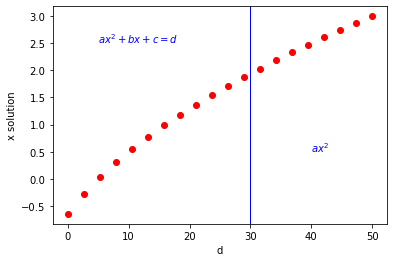

In [28]:
d=np.linspace(0, 50, 20) #creates 20 evenly spaced pts from 0 to 50
x_sol=x_solution(2,9,5,d)
plt.plot(d,x_sol,'ro')
plt.xlabel('d')
plt.ylabel('x solution')
plt.axvline(x=30, linewidth=1, color='b', linestyle='-')
plt.annotate('$a x^2 + b x + c = d$', xy=(5, 2.5), color='b') # you can include text on your plot
plt.annotate('$a x^2$', xy=(40, 0.5), color='b') # you can include text on your plot
plt.show()

Don't forget to include the horizontal lines in your plot, remove the vertical line and of coarse make sure you are plotting the correct function.  Correct the annotations and axis labels

#### (P1) Write a function that finds "x" random points in a square of edge length 2 centered at (0,0). Determines how many of these points are contained in a circle of radius 1 centered at (0,0). Returns the value $\left(4\times \frac{\text{pts in circle}}{\text{total num pts}}\right)$.  Plot the value $\left(4\times \frac{\text{pts in circle}}{\text{total num pts}}\right)$ versus number of points, x.  Also include a horizontal line at the value of pi on your plot. 

From week 3, we did this for 1000 random points.  My code for this was: 

In [14]:
xcoord=(2)*np.random.random(1000)-1 #1000 random pts from -1 to 1
ycoord=(2)*np.random.random(1000)-1 #1000 random pts from -1 to 1
magnitude=np.sqrt(xcoord**2+ycoord**2) #length from center (0,0) to point
mag_test=magnitude<=1
4*len(xcoord[mag_test])/len(xcoord)

3.176

In [15]:
len(xcoord[magnitude<=1])

794

In [16]:
len(xcoord)

1000

Write the above as a function so you can plot the output vs number of points.  Since your number of point chosen, might go from say 1 to 1,000,000 try using geomspace() rather than linspace().  geomspace() gives pts spaced on a log scale which is much better when our values change by orders of magnitude. You could also use linspace() or arange() but with any reasonable step size for the data on the low end you will end up needing a lot of points!  

Don't forget that your function above requires an integer to be input so you will want to make sure geomspace() is giving you an integer or round your list to the nearest integer.  

In [17]:
xdata=np.geomspace(100,1e6,num=50, dtype=int) #tell it to round to the closest integer dtype=int
xdata
# notice the increasing step size as our numbers get larger

array([    100,     120,     145,     175,     212,     255,     308,
           372,     449,     542,     655,     790,     954,    1151,
          1389,    1676,    2023,    2442,    2947,    3556,    4291,
          5179,    6250,    7543,    9102,   10985,   13257,   15998,
         19306,   23299,   28117,   33932,   40949,   49417,   59636,
         71968,   86851,  104811,  126485,  152641,  184206,  222299,
        268269,  323745,  390693,  471486,  568986,  686648,  828642,
       1000000])

#### (P2) Import the csv file "titanic.csv" and (a) determine the percentage of woman that survived and the percentage of men that survived and (b) determine the average ticket price (Fare) for those that survived versus those that did not survive.  0 = did not survive. 1 = survived. 

In lesson 3 we learned how to use pandas to: 
> * import an excel file (now we import a csv file)
> * clean imported data: dropping NAN, filling NAN, renaming columns, dropping rows
> * sorting, slicing, adding new columns
> * Now we need to learn how to group (aggregate) data:  groupby(), sum(), mean()

In [18]:
import os  #we use this to join our file path to our filename
path = r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\data for practice\plastic-cable-insulation-thickness"
filename='raw_clean.csv'
fullpath=os.path.join(path,filename)

raw=pd.read_csv(fullpath)
raw.head()

,Unnamed: 0,Unnamed: 0.1,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,0,0,234.83,55.28,26.67,170.67,Kairo
1,1,1,235.09,54.13,26.97,182.86,Kairo
2,2,2,235.09,54.33,27.46,182.74,Kairo
3,3,3,235.05,55.00,26.83,175.49,Kairo
4,5,5,235.04,55.26,26.62,172.80,Kairo


In [20]:
# dropping first two columns here since I don't need them
df=raw.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df

,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,234.83,55.28,26.67,170.67,Kairo
1,235.09,54.13,26.97,182.86,Kairo
2,235.09,54.33,27.46,182.74,Kairo
3,235.05,55.00,26.83,175.49,Kairo
4,235.04,55.26,26.62,172.80,Kairo
...,...,...,...,...,...
9992,234.92,55.09,26.98,173.84,Cairo
9993,235.22,55.91,27.30,171.86,Cairo
9994,235.13,55.43,26.99,173.59,Cairo
9995,235.05,54.73,26.73,177.21,Cairo


In [21]:
# rounding some of the numbers so they group better
df['LineSpeed']=df.loc[:,'LineSpeed'].round(1)
df['ExtrTemp']=df.loc[:,'ExtrTemp'].round(0)
df

,ExtrTemp,LineSpeed,WaterTemp,Measure,City
0,235.0,55.3,26.67,170.67,Kairo
1,235.0,54.1,26.97,182.86,Kairo
2,235.0,54.3,27.46,182.74,Kairo
3,235.0,55.0,26.83,175.49,Kairo
4,235.0,55.3,26.62,172.80,Kairo
...,...,...,...,...,...
9992,235.0,55.1,26.98,173.84,Cairo
9993,235.0,55.9,27.30,171.86,Cairo
9994,235.0,55.4,26.99,173.59,Cairo
9995,235.0,54.7,26.73,177.21,Cairo


1. Let's find the percentage of Measurements made in Alexandria vs the total number of measurements.  
2. Let's also find the average WaterTemp for all measurements made in Alexandria at a ExtrTemp of 235.0  

In [22]:
# groupby collects all records for the different cities and then
# counts how many records there are
dfgroup=df.groupby(['City']).count()
dfgroup
# try the line below and see what it gives
# dfgroup=df.groupby(['City']).size()
# dfgroup

,ExtrTemp,LineSpeed,WaterTemp,Measure
City,,,,
Alexandria,5520,5520,5520,5520
CAI,17,17,17,17
Cairo,4413,4413,4413,4413
Kairo,47,47,47,47


In [23]:
# using .sum() we can get the total number of records in each column
dfgroup.sum()

ExtrTemp     9997
LineSpeed    9997
WaterTemp    9997
Measure      9997
dtype: int64

In [24]:
# calculating percent of records in Alexandria vs total of 9997
# using .loc[] to pull from dataframe "dfgroup"
# .loc[row, column]
dfgroup.loc['Alexandria','Measure']/9997*100 #percent

55.21656496949085

In [25]:
# now we are grouping by two columns
# we first collect the Cities
# then group within eqach city by the ExtrTemp
# here we take the mean value in these two categories for each column
dfmean=df.groupby(['City','ExtrTemp']).mean()
dfmean

LineSpeed  WaterTemp     Measure
City       ExtrTemp                                  
Alexandria 234.0     54.894118  27.056471  170.712353
           235.0     55.003924  26.999927  175.425584
           236.0     55.115152  27.000606  180.169091
CAI        235.0     55.176471  26.965882  174.288235
Cairo      234.0     54.980645  27.035806  169.769032
           235.0     54.994089  26.993054  175.444202
           236.0     55.014706  27.005294  181.228824
Kairo      235.0     55.093617  26.941915  174.370426

In [26]:
# the mean value of WaterTemp in Alexandria at an ExtrTemp of 235 degrees is
dfmean.loc[('Alexandria',235.0), 'WaterTemp']

26.999926645883

#### For a lot more control, we could use pivot_table to specify different aggregation functions for each column of values we want to analyze.  You should be able to do what you want with groupby() but the pivot_table is a more manual way to specify many options.  

In [155]:
pd.pivot_table(df, values=['Measure', 'WaterTemp','LineSpeed'], index=['City', 'ExtrTemp'],
                    aggfunc={'Measure': np.mean,
                             'WaterTemp': [min, max, np.mean],
                            'LineSpeed':[np.sum,np.mean,np.size]})

LineSpeed                       Measure WaterTemp  \
                          mean    size       sum        mean       max   
City       ExtrTemp                                                      
Alexandria 234.0     54.894118    34.0    1866.4  170.712353     27.56   
           235.0     55.003924  5453.0  299936.4  175.425584     27.70   
           236.0     55.115152    33.0    1818.8  180.169091     27.44   
CAI        235.0     55.176471    17.0     938.0  174.288235     27.33   
Cairo      234.0     54.980645    31.0    1704.4  169.769032     27.41   
           235.0     54.994089  4348.0  239114.3  175.444202     27.66   
           236.0     55.014706    34.0    1870.5  181.228824     27.30   
Kairo      235.0     55.093617    47.0    2589.4  174.370426     27.46   

                                       
                          mean    min  
City       ExtrTemp                    
Alexandria 234.0     27.056471  26.52  
           235.0     26.999927  26.15  
           236.0     27.000606  26.42  
CAI        235.0     26.965882  26.44  
Cairo      234.0     27.035806  26.58  
           235.0     26.993054  26.29  
           236.0     27.005294  26.70  
Kairo      235.0     26.941915  26.38